**Dataset Source**: https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset?resource=download

In [2]:
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("miami-housing.csv")
df.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


#### The dataset contains the following columns:


**PARCELNO**: unique identifier for each property. About 1% appear multiple times.<br>
**SALE_PRC**: sale price (USD) <br>
**LND_SQFOOT**: land area (square feet)<br>
**TOT_LVG_AREA**: floor area (square feet)<br>
**SPEC_FEAT_VAL**: value of special features (e.g., swimming pools) (USD)<br>
**RAIL_DIST**: distance to the nearest rail line (an indicator of noise) (feet)<br>
**OCEAN_DIST**: distance to the ocean (feet)<br>
**WATER_DIST**: distance to the nearest body of water (feet)<br>
**CNTR_DIST**: distance to the Miami central business district (feet)<br>
**SUBCNTR_DI**: distance to the nearest subcenter (feet)<br>
**HWY_DIST**: distance to the nearest highway (an indicator of noise) (feet)<br>
**age**: age of the structure<br>
**avno60plus**: dummy variable for airplane noise exceeding an acceptable level<br>
**structure_quality**: quality of the structure<br>
**month_sold**: sale month in 2016 (1 = jan)<br>
**LATITUDE**<br>
**LONGITUDE**

In [4]:
# Shape of df
df.shape

(13932, 17)

In [5]:
# Check for any null or missing values by column
df.isnull().sum()

LATITUDE             0
LONGITUDE            0
PARCELNO             0
SALE_PRC             0
LND_SQFOOT           0
TOT_LVG_AREA         0
SPEC_FEAT_VAL        0
RAIL_DIST            0
OCEAN_DIST           0
WATER_DIST           0
CNTR_DIST            0
SUBCNTR_DI           0
HWY_DIST             0
age                  0
avno60plus           0
month_sold           0
structure_quality    0
dtype: int64

In [7]:
# Correlation matrix of each feature
corr = df.corr()
corr

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,structure_quality
SALE_PRC,1.000000,0.363077,0.667301,0.497500,0.383995
LND_SQFOOT,0.363077,1.000000,0.437472,0.390707,-0.006686
TOT_LVG_AREA,0.667301,0.437472,1.000000,0.506064,0.173422
SPEC_FEAT_VAL,0.497500,0.390707,0.506064,1.000000,0.188030
structure_quality,0.383995,-0.006686,0.173422,0.188030,1.000000


In [6]:
# Drop unimportant columns
df.drop(columns=['LATITUDE', 'LONGITUDE', 'PARCELNO', 'avno60plus', 'month_sold', 'age', 'RAIL_DIST',
                'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST'], inplace=True)
df.head()

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,structure_quality
0,440000.0,9375,1753,0,4
1,349000.0,9375,1715,0,4
2,800000.0,9375,2276,49206,4
3,988000.0,12450,2058,10033,4
4,755000.0,12800,1684,16681,4


In [8]:
df.shape

(13932, 5)

<Axes: >

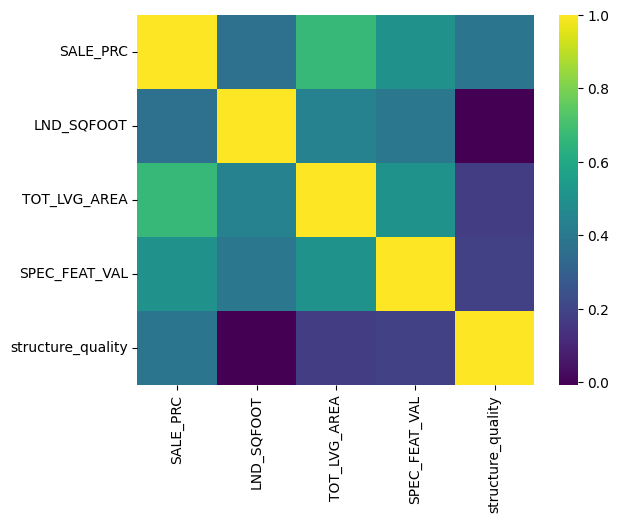

In [9]:
cmap = sb.color_palette("viridis", as_cmap=True)
sb.heatmap(corr, cmap=cmap)

In [10]:
corr2 = df.corr()

<AxesSubplot:>

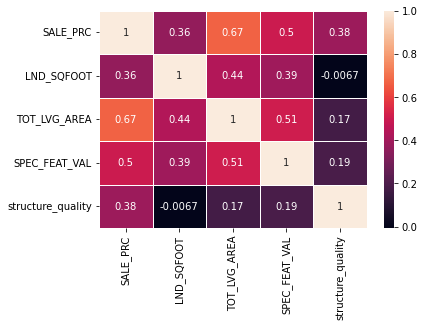

In [11]:
cmap = sb.color_palette("rocket", as_cmap=True)
sb.heatmap(corr2,  annot=True, cmap=cmap, linewidth=.5)

In [12]:
df.dtypes

SALE_PRC             float64
LND_SQFOOT             int64
TOT_LVG_AREA           int64
SPEC_FEAT_VAL          int64
structure_quality      int64
dtype: object

In [10]:
df['structure_quality'].unique()

array([4, 5, 2, 1, 3], dtype=int64)

In [11]:
df.describe()

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,structure_quality
count,1.393200e+04,13932.000000,13932.000000,13932.000000,13932.000000
mean,3.999419e+05,8620.879917,2058.044574,9562.493468,3.513997
std,3.172147e+05,6070.088742,813.538535,13890.967782,1.097444
min,7.200000e+04,1248.000000,854.000000,0.000000,1.000000
25%,2.350000e+05,5400.000000,1470.000000,810.000000,2.000000
50%,3.100000e+05,7500.000000,1877.500000,2765.500000,4.000000
75%,4.280000e+05,9126.250000,2471.000000,12352.250000,4.000000
max,2.650000e+06,57064.000000,6287.000000,175020.000000,5.000000


<Axes: xlabel='LND_SQFOOT', ylabel='SALE_PRC'>

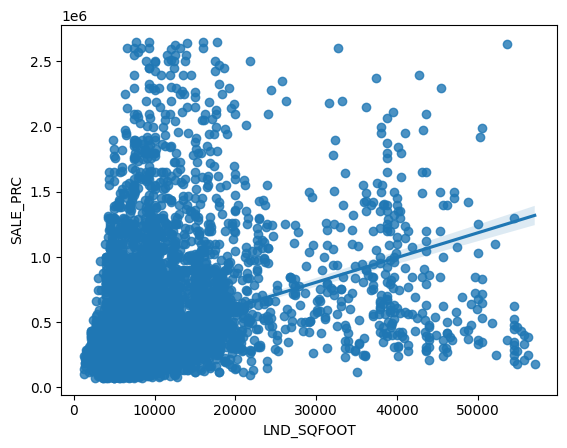

In [12]:
sb.regplot(data=df, x="LND_SQFOOT", y="SALE_PRC")

<Axes: xlabel='TOT_LVG_AREA', ylabel='SALE_PRC'>

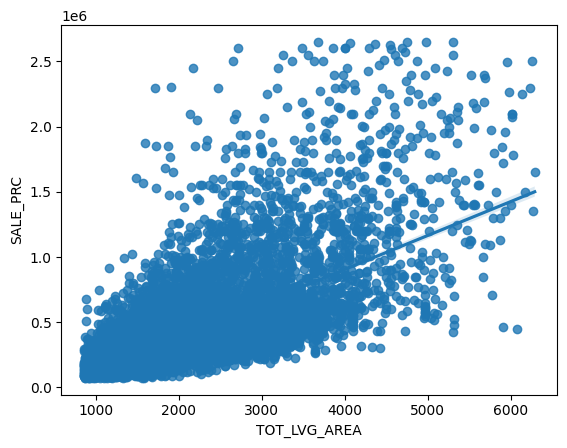

In [13]:
sb.regplot(data=df, x="TOT_LVG_AREA", y="SALE_PRC")

<Axes: xlabel='SPEC_FEAT_VAL', ylabel='SALE_PRC'>

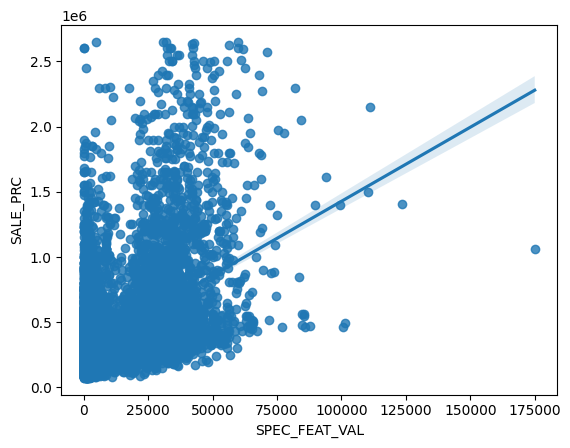

In [14]:
sb.regplot(data=df, x="SPEC_FEAT_VAL", y="SALE_PRC")

<Axes: xlabel='structure_quality', ylabel='SALE_PRC'>

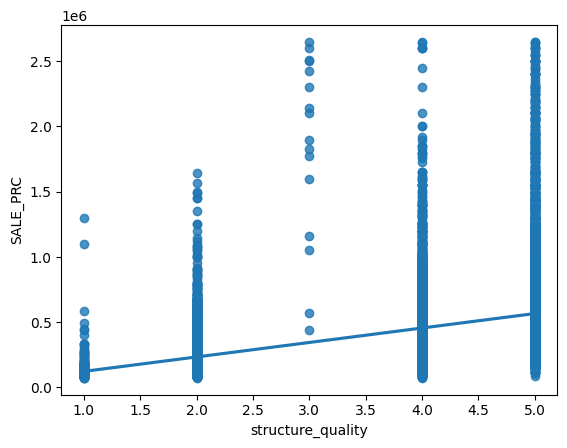

In [15]:
sb.regplot(data=df, x="structure_quality", y="SALE_PRC")

In [19]:
df.head()

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,structure_quality
0,440000.0,9375,1753,0,4
1,349000.0,9375,1715,0,4
2,800000.0,9375,2276,49206,4
3,988000.0,12450,2058,10033,4
4,755000.0,12800,1684,16681,4


In [16]:
# Create independent and dependent features
x = df.iloc[:,1:]
x

,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,structure_quality
0,9375,1753,0,4
1,9375,1715,0,4
2,9375,2276,49206,4
3,12450,2058,10033,4
4,12800,1684,16681,4
...,...,...,...,...
13927,6780,967,6580,4
13928,7500,1854,2544,4
13929,8460,1271,2064,4
13930,7500,1613,3136,4


In [18]:
y = df.iloc[:, 0]
y

0        440000.0
1        349000.0
2        800000.0
3        988000.0
4        755000.0
           ...   
13927    275000.0
13928    340000.0
13929    287500.0
13930    315000.0
13931    250000.0
Name: SALE_PRC, Length: 13932, dtype: float64

In [19]:
# Normalize/Standardize data using scaler
scaler = StandardScaler()

In [20]:
scaler.fit_transform(x,y)

array([[ 0.12423989, -0.37497366, -0.6884212 ,  0.44286615],
       [ 0.12423989, -0.42168486, -0.6884212 ,  0.44286615],
       [ 0.12423989,  0.26792001,  2.85400773,  0.44286615],
       ...,
       [-0.02650467, -0.9674684 , -0.5398301 ,  0.44286615],
       [-0.18466289, -0.54706757, -0.46265489,  0.44286615],
       [ 0.03494639, -0.23484005, -0.66927138,  0.44286615]])

In [21]:
# train test split on data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(x_train, y_train)

LinearRegression()

In [24]:
lr.score(x_test, y_test)

0.5516144386236199

In [25]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

### Finding Outliers in Data with Statistical Methods
<br>
Will calculate the outliers using Interquartile Range (IQR). Using IQR, the outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR. The Q1 is the 25th percentile and Q3 is the 75th percentile of the dataset, and IQR represents the interquartile range calculated by Q3 minus Q1 (Q3–Q1).Using the convenient pandas .quantile() function, I can create a simple Python function that takes in  columns from the dataframe and outputs the outliers. 

In [26]:
#create a function to find outliers using IQR

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [27]:
outliers = find_outliers_IQR(df["LND_SQFOOT"])

print("number of outliers: " + str(len(outliers)))

print("max outlier value: " + str(outliers.max()))

print("min outlier value: " + str(outliers.min()))

outliers

number of outliers: 1370
max outlier value: 57064
min outlier value: 14726


22       18745
31       15244
66       15963
103      16006
158      17577
         ...  
13666    17500
13676    15875
13792    15000
13794    15000
13918    15000
Name: LND_SQFOOT, Length: 1370, dtype: int64

In [28]:
len(df["LND_SQFOOT"])

13932

In [29]:
13932-1370 # outliers

12562

In [30]:
outliers = find_outliers_IQR(df["TOT_LVG_AREA"])

print("number of outliers: " + str(len(outliers)))

print("max outlier value: " + str(outliers.max()))

print("min outlier value: " + str(outliers.min()))

outliers

number of outliers: 447
max outlier value: 6287
min outlier value: 3973


19       4552
22       3992
25       4428
27       4028
36       4480
         ... 
12070    4258
12071    4553
13086    4189
13102    4495
13109    5031
Name: TOT_LVG_AREA, Length: 447, dtype: int64

In [31]:
len(df["TOT_LVG_AREA"])

13932

In [32]:
13932-447

13485

In [33]:
outliers = find_outliers_IQR(df["SPEC_FEAT_VAL"])

print("number of outliers: " + str(len(outliers)))

print("max outlier value: " + str(outliers.max()))

print("min outlier value: " + str(outliers.min()))

outliers

number of outliers: 1703
max outlier value: 175020
min outlier value: 29667


2        49206
7        34933
9        34580
17       37975
19       35124
         ...  
13795    33664
13809    32602
13811    39444
13835    30159
13857    32132
Name: SPEC_FEAT_VAL, Length: 1703, dtype: int64

In [34]:
len(df["SPEC_FEAT_VAL"])

13932

In [35]:
13932-1703

12229

In [36]:
outliers = find_outliers_IQR(df["structure_quality"])

print("number of outliers: " + str(len(outliers)))

print("max outlier value: " + str(outliers.max()))

print("min outlier value: " + str(outliers.min()))

outliers

number of outliers: 0
max outlier value: nan
min outlier value: nan


Series([], Name: structure_quality, dtype: int64)

In [37]:
len(df["structure_quality"])

13932

In [38]:
outliers = find_outliers_IQR(df["SALE_PRC"])

print("number of outliers: " + str(len(outliers)))

print("max outlier value: " + str(outliers.max()))

print("min outlier value: " + str(outliers.min()))

outliers

number of outliers: 1340
max outlier value: 2650000.0
min outlier value: 718600.0


2         800000.0
3         988000.0
4         755000.0
6        1020000.0
7         850000.0
           ...    
12076     891100.0
12077     745000.0
12078     732500.0
12079     740000.0
13109     830000.0
Name: SALE_PRC, Length: 1340, dtype: float64

In [39]:
len(df["SALE_PRC"])

13932

In [40]:
13932-1340

12592

### Dealing with the Outliers
<br>
Dropping the outliers will essentially exclude them from the analysis and modeling. 

In [41]:
#create a function to drop outliers identified above

def drop_outliers_IQR(df):
    
    q1=df.quantile(0.25)
    
    q3=df.quantile(0.75)
    
    IQR=q3-q1
    
    not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    
    outliers_dropped = outliers.dropna().reset_index()    

    return not_outliers

In [42]:
df2 = drop_outliers_IQR(df[["SALE_PRC", "LND_SQFOOT", "TOT_LVG_AREA", "SPEC_FEAT_VAL", "structure_quality"]])
df2

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,structure_quality
0,440000.0,9375.0,1753.0,0.0,4
1,349000.0,9375.0,1715.0,0.0,4
2,NaN,9375.0,2276.0,NaN,4
3,NaN,12450.0,2058.0,10033.0,4
4,NaN,12800.0,1684.0,16681.0,4
...,...,...,...,...,...
13927,275000.0,6780.0,967.0,6580.0,4
13928,340000.0,7500.0,1854.0,2544.0,4
13929,287500.0,8460.0,1271.0,2064.0,4
13930,315000.0,7500.0,1613.0,3136.0,4


In [43]:
# Check for any null or missing values by column
df2.isnull().sum()

SALE_PRC             1340
LND_SQFOOT           1370
TOT_LVG_AREA          447
SPEC_FEAT_VAL        1703
structure_quality       0
dtype: int64

Need to drop NULL values that were outliers in each column.

In [44]:
df3 = df2.dropna()
df3

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,structure_quality
0,440000.0,9375.0,1753.0,0.0,4
1,349000.0,9375.0,1715.0,0.0,4
5,630000.0,9900.0,1531.0,2978.0,4
8,250000.0,9375.0,1493.0,11668.0,4
11,260000.0,8438.0,1794.0,0.0,2
...,...,...,...,...,...
13927,275000.0,6780.0,967.0,6580.0,4
13928,340000.0,7500.0,1854.0,2544.0,4
13929,287500.0,8460.0,1271.0,2064.0,4
13930,315000.0,7500.0,1613.0,3136.0,4


In [45]:
df3.isnull().sum()

SALE_PRC             0
LND_SQFOOT           0
TOT_LVG_AREA         0
SPEC_FEAT_VAL        0
structure_quality    0
dtype: int64

Structure_quality is a categorical variable rating of the housing structure that can range between 1 - 5. To better improve the model, I will solve this by creating dummy variables for each rating using one-hot encoding which will produce 5 new columns for each rating score and signal to model whether rating is a 4 with "1" and "0" for no and so on for the other ratings.

In [46]:
df4 = pd.get_dummies(data=df3, columns=['structure_quality'])
df4.columns

Index(['SALE_PRC', 'LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL',
       'structure_quality_1', 'structure_quality_2', 'structure_quality_3',
       'structure_quality_4', 'structure_quality_5'],
      dtype='object')

In [47]:
# Create independent and dependent features
x = df4.iloc[:,1:]
x

,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,structure_quality_1,structure_quality_2,structure_quality_3,structure_quality_4,structure_quality_5
0,9375.0,1753.0,0.0,False,False,False,True,False
1,9375.0,1715.0,0.0,False,False,False,True,False
5,9900.0,1531.0,2978.0,False,False,False,True,False
8,9375.0,1493.0,11668.0,False,False,False,True,False
11,8438.0,1794.0,0.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...
13927,6780.0,967.0,6580.0,False,False,False,True,False
13928,7500.0,1854.0,2544.0,False,False,False,True,False
13929,8460.0,1271.0,2064.0,False,False,False,True,False
13930,7500.0,1613.0,3136.0,False,False,False,True,False


In [48]:
y = df4.iloc[:, 0]
y

0        440000.0
1        349000.0
5        630000.0
8        250000.0
11       260000.0
           ...   
13927    275000.0
13928    340000.0
13929    287500.0
13930    315000.0
13931    250000.0
Name: SALE_PRC, Length: 10826, dtype: float64

In [49]:
x.shape

(10826, 8)

In [50]:
y.shape

(10826,)

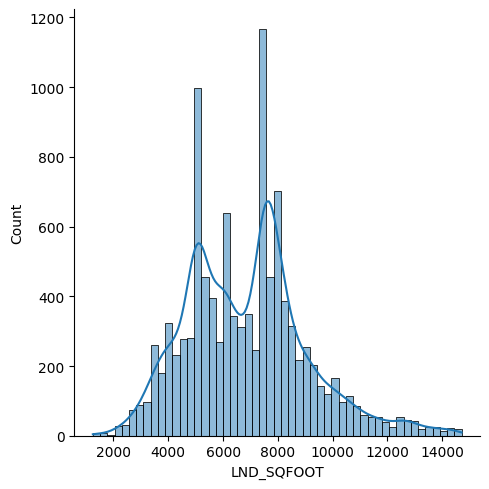

In [51]:
sb.displot(data=df3, x="LND_SQFOOT", kde=True)

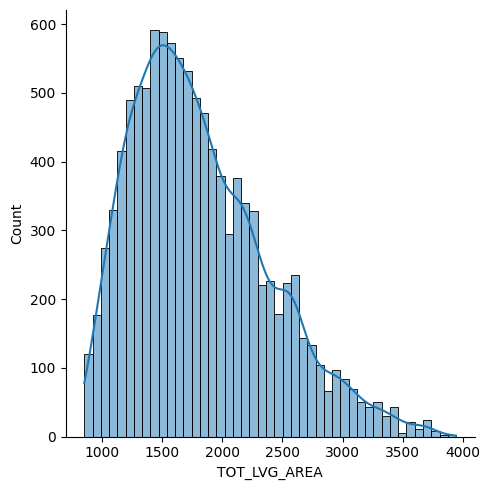

In [52]:
sb.displot(data=df3, x="TOT_LVG_AREA", kde=True)

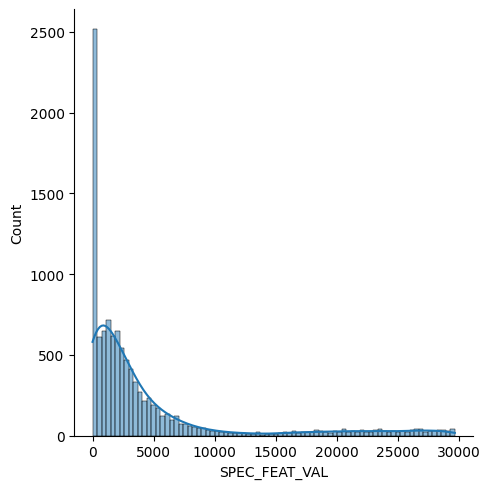

In [53]:
sb.displot(data=df3, x="SPEC_FEAT_VAL", kde=True)

In [54]:
df3.describe()

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,structure_quality
count,10826.000000,10826.000000,10826.000000,10826.000000,10826.000000
mean,294515.407999,6873.672825,1814.253926,4490.150563,3.405321
std,113386.488760,2224.309248,566.752084,6810.738821,1.088994
min,72000.000000,1248.000000,854.000000,0.000000,1.000000
25%,217000.000000,5100.000000,1388.000000,495.000000,2.000000
50%,280000.000000,6900.000000,1714.000000,2028.500000,4.000000
75%,350000.000000,8056.000000,2163.000000,4637.000000,4.000000
max,716000.000000,14703.000000,3942.000000,29648.000000,5.000000


In [55]:
# train test split on data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [56]:
x_train.shape

(7578, 8)

C:\Users\S537849\AppData\Local\Temp\ipykernel_15056\752348029.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(x_train)


<Axes: ylabel='Density'>

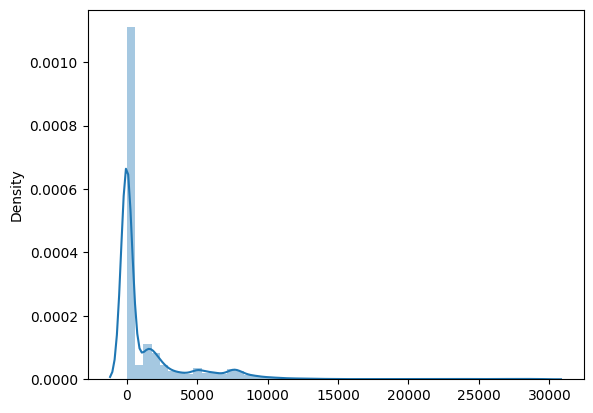

In [57]:
sb.distplot(x_train)

In [58]:
y_train.shape

(7578,)

In [59]:
x_test.shape

(3248, 8)

In [60]:
y_test.shape

(3248,)

## Checking Distribution

C:\Users\S537849\AppData\Local\Temp\ipykernel_15056\3137497993.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(x, bins=30)


<Axes: ylabel='Density'>

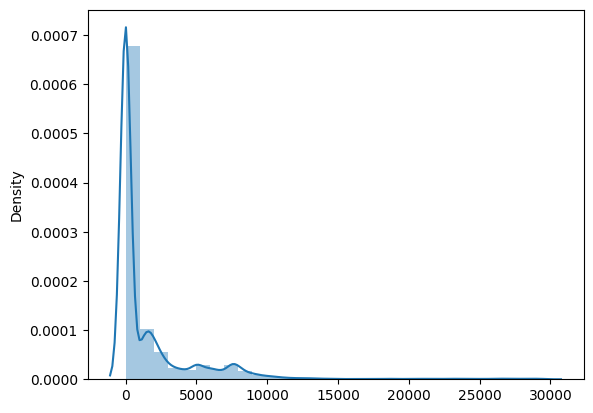

In [61]:
sb.distplot(x, bins=30)

In [62]:
# Normalize/Standardize data using scaler
scaler = StandardScaler()

Standard scaler will be very important to getting all of the data points on the same scale in order for gradient descent to reach global minimum in linear regression step and converge faster.

In [63]:
x_train_scale = scaler.fit_transform(x_train)

C:\Users\S537849\AppData\Local\Temp\ipykernel_15056\2547541250.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(x_train, bins=5)


<Axes: ylabel='Density'>

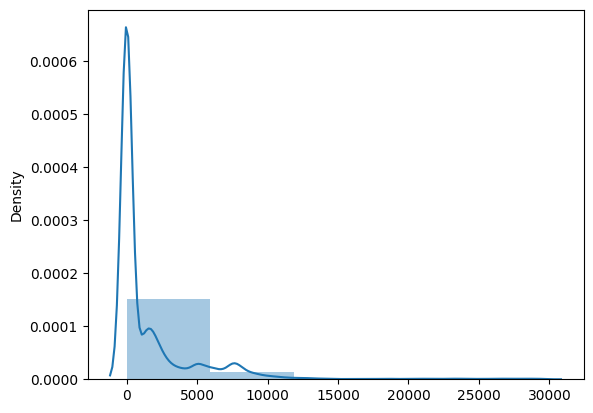

In [64]:
sb.distplot(x_train, bins=5)

In [65]:
x_test_scale = scaler.transform(x_test)

## Model Training

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
lr = LinearRegression()

In [68]:
lr.fit(x_train_scale, y_train)

LinearRegression()

In [69]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [70]:
y_pred = lr.predict(x_test_scale)

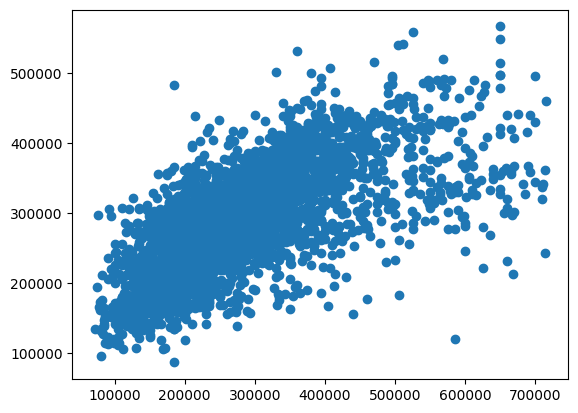

In [71]:
plt.scatter(y_test, y_pred) 

In [72]:
# residuals plot -> errors
residuals = y_test - y_pred

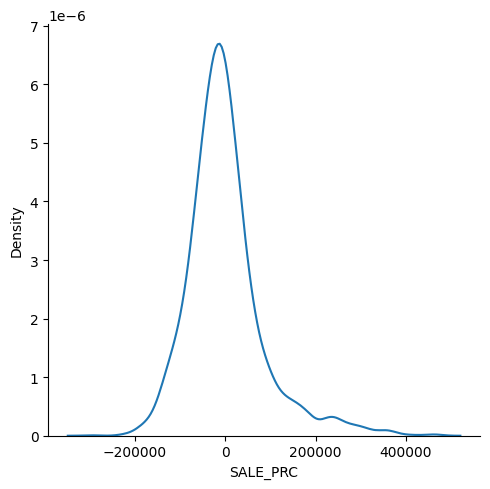

In [73]:
# residuals plot
sb.displot(residuals, kind="kde")

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [75]:
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred))) #root mse

7226783755.255294
59609.63051022055
85010.492030427


In [76]:
lr.score(x_test_scale, y_test)

0.4413803279252073